In [49]:
#import librarires that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

print("Libraries imported successfully")

#load the data
data = pd.read_csv("/Users/anurag/Desktop/Anurag_Dey_A1/laptop_price_task/data/laptop_price.csv")

print("Data loaded successfully")


Libraries imported successfully
Data loaded successfully


In [50]:
# COMPREHENSIVE EXPLORATORY DATA ANALYSIS (EDA) FOR LAPTOP PRICE DATASET

# 1. BASIC DATA INFORMATION
print("BASIC DATASET INFORMATION")

# Display basic info
print(f"Dataset Shape: {data.shape}")
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")
print("\nColumn Names:")
print(data.columns.tolist())
print("\nData Types:")
print(data.dtypes)
print("\nFirst 5 rows:")
data.head()


BASIC DATASET INFORMATION
Dataset Shape: (1172, 11)
Number of Rows: 1172
Number of Columns: 11

Column Names:
['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']

Data Types:
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

First 5 rows:


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.5kg,52161.120
1,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,14811.840
2,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,14646.672
3,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.720
4,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,23976.000


In [51]:
# 2. MISSING VALUES AND DATA QUALITY CHECKS
print("MISSING VALUES AND DATA QUALITY ANALYSIS")

# Check for missing values
print("Missing Values Count:")
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)
print(missing_df)

# Check for empty strings and whitespace-only values
print("\nChecking for empty strings and whitespace-only values:")
for col in data.select_dtypes(include=['object']).columns:
    empty_strings = (data[col] == '').sum()
    whitespace_only = data[col].str.strip().eq('').sum()
    print(f"{col}: {empty_strings} empty strings, {whitespace_only} whitespace-only values")

# Basic statistics
print("\nBasic Statistical Summary:")
data.describe(include='all')


MISSING VALUES AND DATA QUALITY ANALYSIS
Missing Values Count:
                  Missing Count  Percentage
Company                       0         0.0
TypeName                      0         0.0
Inches                        0         0.0
ScreenResolution              0         0.0
Cpu                           0         0.0
Ram                           0         0.0
Memory                        0         0.0
Gpu                           0         0.0
OpSys                         0         0.0
Weight                        0         0.0
Price                         0         0.0

Checking for empty strings and whitespace-only values:
Company: 0 empty strings, 0 whitespace-only values
TypeName: 0 empty strings, 0 whitespace-only values
ScreenResolution: 0 empty strings, 0 whitespace-only values
Cpu: 0 empty strings, 0 whitespace-only values
Ram: 0 empty strings, 0 whitespace-only values
Memory: 0 empty strings, 0 whitespace-only values
Gpu: 0 empty strings, 0 whitespace-only values

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1172,1172,1172.00000,1172,1172,1172,1172,1172,1172,1172,1172.000000
unique,19,6,NaN,39,111,9,38,104,9,172,NaN
top,Lenovo,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,268,660,NaN,460,167,556,369,248,961,113,NaN
mean,NaN,NaN,15.04343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60081.426123
std,NaN,NaN,1.41257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37460.969532
min,NaN,NaN,10.10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,NaN,NaN,14.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32114.520000
50%,NaN,NaN,15.60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52161.120000
75%,NaN,NaN,15.60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79346.840400


In [52]:
# 3. DUPLICATE RECORDS ANALYSIS
print("DUPLICATE RECORDS ANALYSIS")

# Check for duplicate rows
total_duplicates = data.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates}")

if total_duplicates > 0:
    print("Duplicate rows:")
    duplicates = data[data.duplicated(keep=False)]
    print(duplicates)
    
    # Show which columns have the most duplicates
    print("\nDuplicate analysis by columns:")
    for col in data.columns:
        col_duplicates = data[col].duplicated().sum()
        print(f"{col}: {col_duplicates} duplicate values")
else:
    print("No duplicate rows found!")

# Check for near-duplicates (same except for price)
print(f"\nChecking for near-duplicates (same specs, different prices):")
feature_cols = [col for col in data.columns if col != 'Price']
near_duplicates = data.duplicated(subset=feature_cols, keep=False).sum()
print(f"Rows with identical features but potentially different prices: {near_duplicates}")

if near_duplicates > 0:
    near_dup_data = data[data.duplicated(subset=feature_cols, keep=False)].sort_values(feature_cols)
    print("Sample near-duplicate records:")
    print(near_dup_data.head(10))


DUPLICATE RECORDS ANALYSIS
Total duplicate rows: 25
Duplicate rows:
     Company            TypeName  Inches  \
42        HP            Notebook    15.6   
82      Asus            Notebook    15.6   
116       HP            Notebook    15.6   
156   Lenovo  2 in 1 Convertible    14.0   
181       HP             Netbook    11.6   
257       HP            Notebook    15.6   
260     Dell            Notebook    15.6   
266     Asus           Ultrabook    13.3   
354     Asus           Ultrabook    13.3   
362     Asus            Notebook    15.6   
370     Asus           Ultrabook    13.3   
377     Asus            Notebook    15.6   
402     Acer            Notebook    15.6   
427     Acer            Notebook    15.6   
447   Lenovo            Notebook    14.0   
467   Lenovo            Notebook    15.6   
483       HP            Notebook    15.6   
528     Dell            Notebook    15.6   
549   Lenovo            Notebook    14.0   
588     Asus            Notebook    15.6   
659   Le

TARGET VARIABLE ANALYSIS - PRICE
Price Statistics:
Mean: ₹60081.43
Median: ₹52161.12
Standard Deviation: ₹37460.97
Minimum: ₹9270.72
Maximum: ₹324954.72
Range: ₹315684.00

Quartile Analysis:
Q1 (25th percentile): ₹32114.52
Q3 (75th percentile): ₹79346.84
IQR: ₹47232.32

Outliers (IQR method): 28 (2.39%)


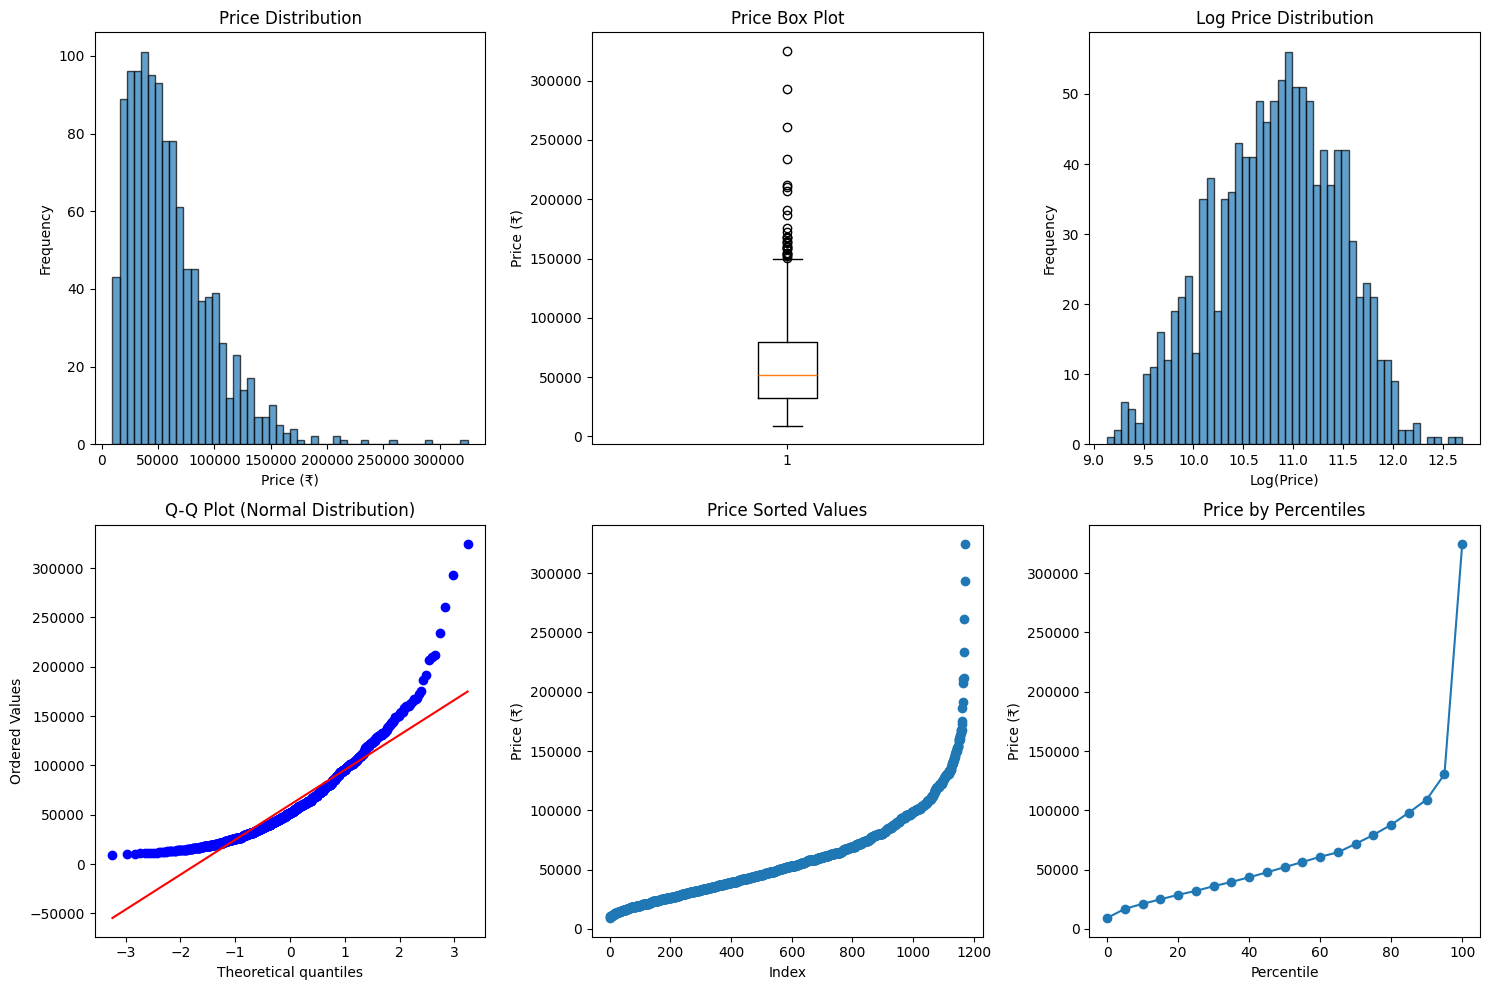


Price Distribution Analysis:
Skewness: 1.564
Kurtosis: 4.636


In [53]:
# 4. TARGET VARIABLE ANALYSIS (PRICE)
print("TARGET VARIABLE ANALYSIS - PRICE")

# Basic statistics for Price
print("Price Statistics:")
print(f"Mean: ₹{data['Price'].mean():.2f}")
print(f"Median: ₹{data['Price'].median():.2f}")
print(f"Standard Deviation: ₹{data['Price'].std():.2f}")
print(f"Minimum: ₹{data['Price'].min():.2f}")
print(f"Maximum: ₹{data['Price'].max():.2f}")
print(f"Range: ₹{data['Price'].max() - data['Price'].min():.2f}")

# Quartiles and IQR
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
print(f"\nQuartile Analysis:")
print(f"Q1 (25th percentile): ₹{Q1:.2f}")
print(f"Q3 (75th percentile): ₹{Q3:.2f}")
print(f"IQR: ₹{IQR:.2f}")

# Detect outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]
print(f"\nOutliers (IQR method): {len(outliers_iqr)} ({len(outliers_iqr)/len(data)*100:.2f}%)")

# Price distribution visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(data['Price'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.boxplot(data['Price'])
plt.title('Price Box Plot')
plt.ylabel('Price (₹)')

plt.subplot(2, 3, 3)
plt.hist(np.log(data['Price']), bins=50, edgecolor='black', alpha=0.7)
plt.title('Log Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
from scipy import stats
stats.probplot(data['Price'], dist="norm", plot=plt)
plt.title('Q-Q Plot (Normal Distribution)')

plt.subplot(2, 3, 5)
plt.scatter(range(len(data)), sorted(data['Price']))
plt.title('Price Sorted Values')
plt.xlabel('Index')
plt.ylabel('Price (₹)')

plt.subplot(2, 3, 6)
# Price by percentiles
percentiles = np.arange(0, 101, 5)
price_percentiles = [np.percentile(data['Price'], p) for p in percentiles]
plt.plot(percentiles, price_percentiles, marker='o')
plt.title('Price by Percentiles')
plt.xlabel('Percentile')
plt.ylabel('Price (₹)')

plt.tight_layout()
plt.show()

print(f"\nPrice Distribution Analysis:")
print(f"Skewness: {data['Price'].skew():.3f}")
print(f"Kurtosis: {data['Price'].kurtosis():.3f}")


CATEGORICAL FEATURES ANALYSIS
Categorical columns: ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']

--- Company ---
Unique values: 19
Value counts:
Company
Lenovo     268
Dell       262
HP         253
Asus       138
Acer        95
MSI         49
Toshiba     43
Apple       20
Razer        7
Samsung      7
Name: count, dtype: int64

Average price by Company:
                    mean       median  count
Company                                     
Razer      178282.491429  154458.7200      7
Google     117162.720000  117162.7200      1
LG         111834.720000  111834.7200      2
MSI         91319.788800   85194.7200     49
Microsoft   85903.788000   83622.9600      6
Apple       84409.292880   73491.5016     20
Huawei      75870.720000   75870.7200      2
Samsung     69058.491429   85194.7200      7
Toshiba     66150.217674   64628.6400     43
Dell        63299.275530   52986.6936    262

--- TypeName ---
Unique values: 6
Value counts:
TypeNa

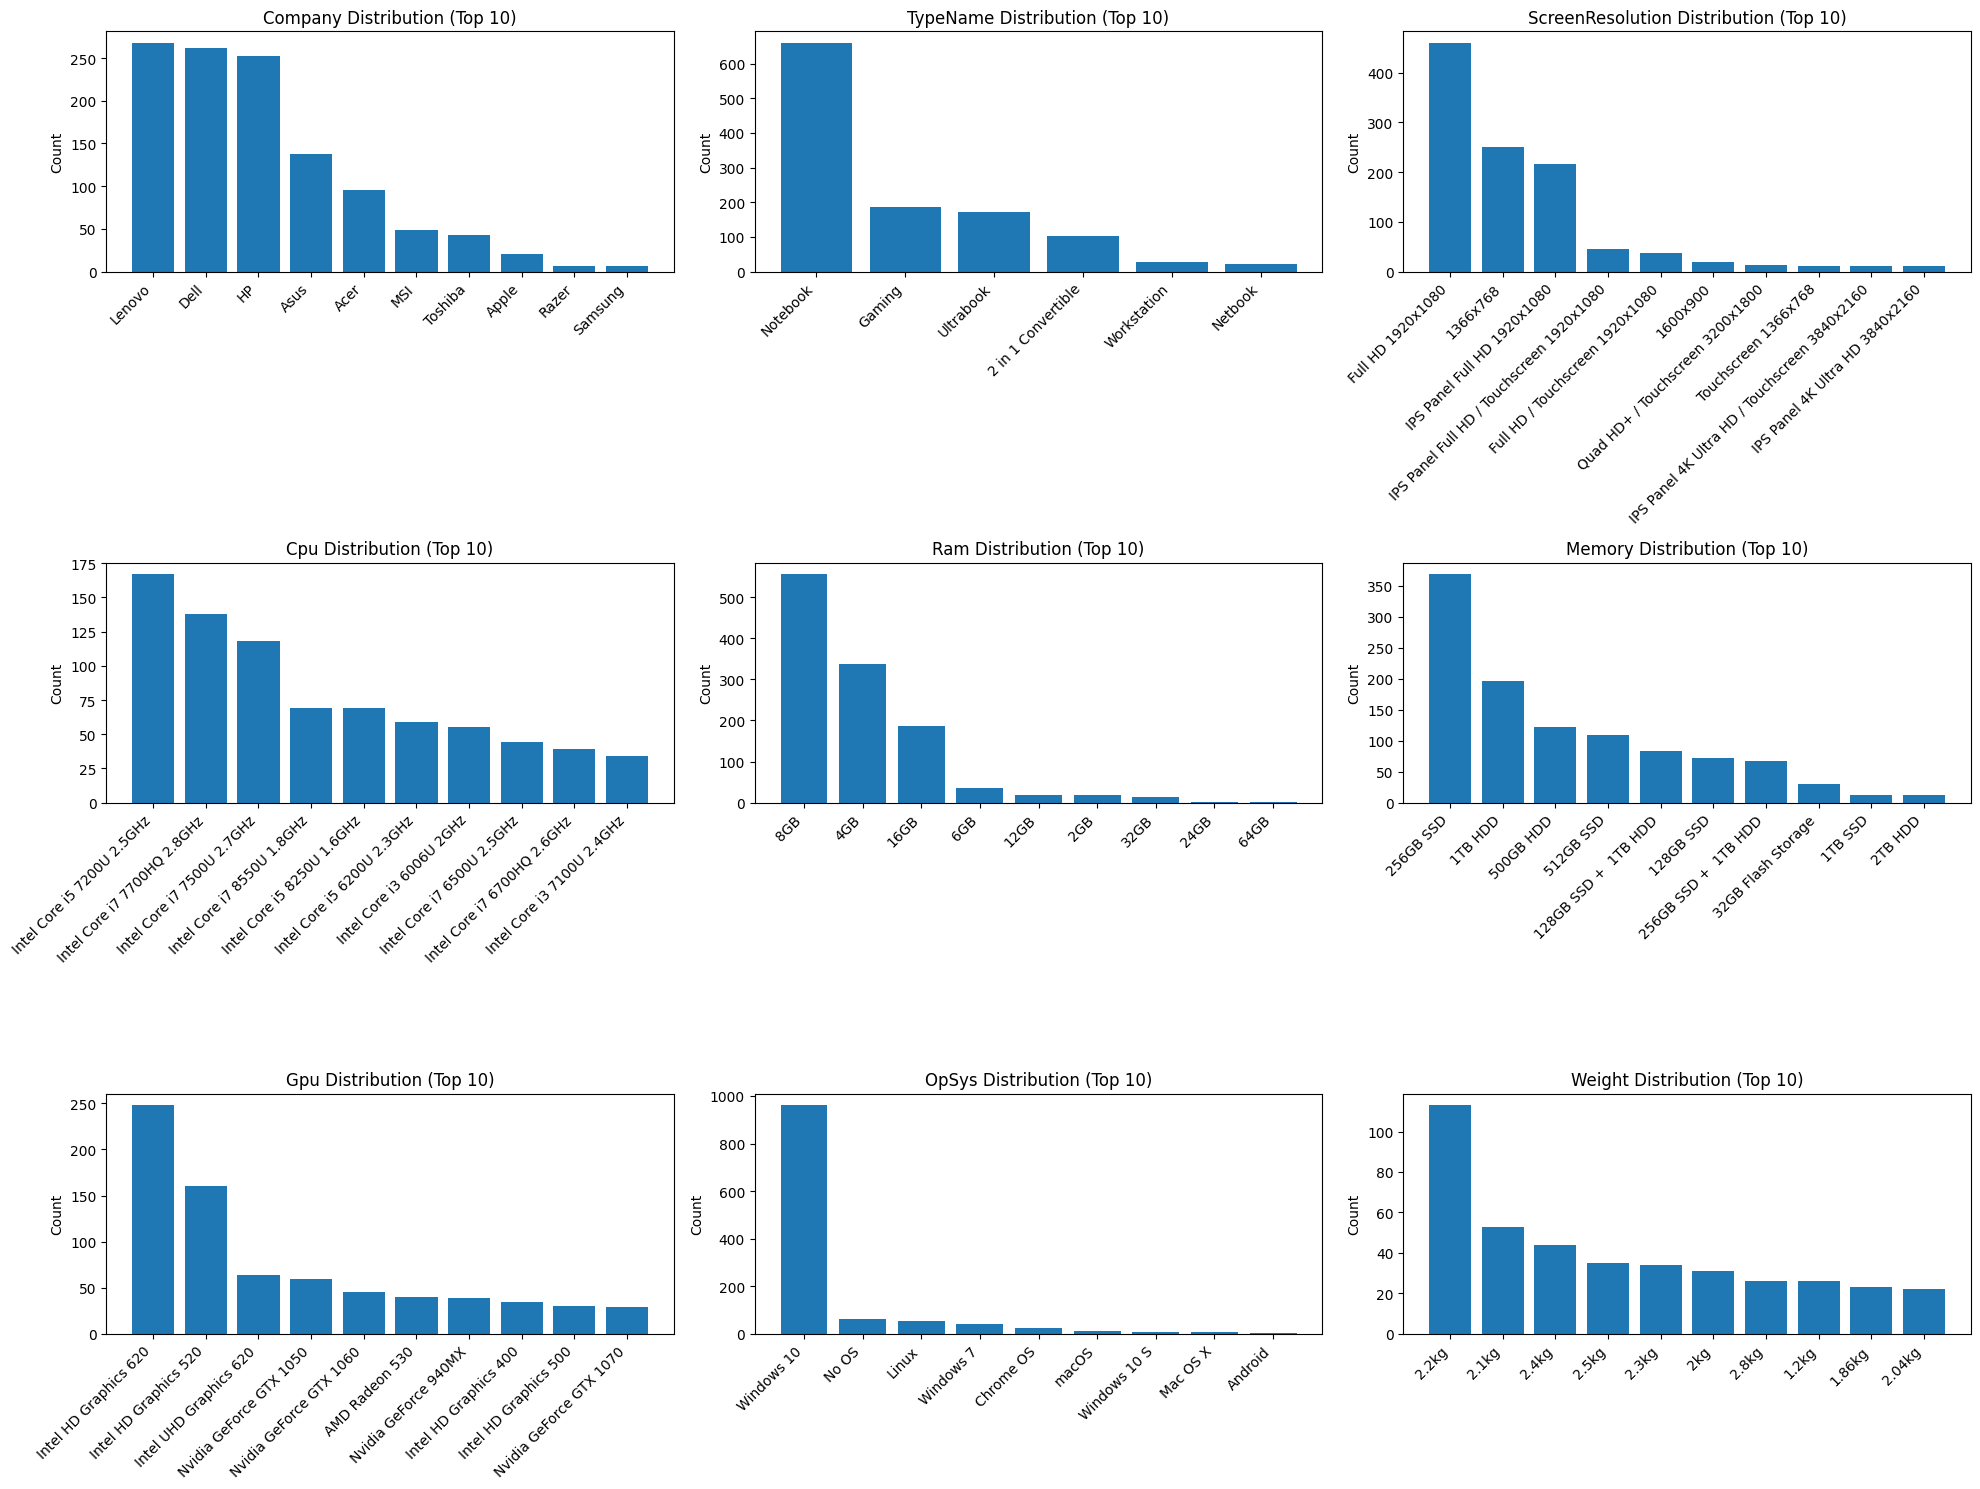

In [54]:
# 5. CATEGORICAL FEATURES ANALYSIS
print("CATEGORICAL FEATURES ANALYSIS")

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Analyze each categorical column
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Unique values: {data[col].nunique()}")
    print(f"Value counts:")
    print(data[col].value_counts().head(10))
    
    # Calculate average price for each category
    avg_price = data.groupby(col)['Price'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
    print(f"\nAverage price by {col}:")
    print(avg_price.head(10))

# Visualization for categorical variables
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Top categories by frequency
        top_categories = data[col].value_counts().head(10)
        
        axes[i].bar(range(len(top_categories)), top_categories.values)
        axes[i].set_title(f'{col} Distribution (Top 10)')
        axes[i].set_xticks(range(len(top_categories)))
        axes[i].set_xticklabels(top_categories.index, rotation=45, ha='right')
        axes[i].set_ylabel('Count')

# Remove empty subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


NUMERICAL FEATURES ANALYSIS
Numerical columns: ['Inches']
Weight column contains string values - would need conversion in preprocessing
Updated numerical columns: ['Inches', 'Weight_temp']

Numerical Features Statistics:
           Inches  Weight_temp
count  1172.00000  1172.000000
mean     15.04343     2.047943
std       1.41257     0.662899
min      10.10000     0.690000
25%      14.00000     1.530000
50%      15.60000     2.040000
75%      15.60000     2.310000
max      17.30000     4.700000

Correlation with Price:
Price          1.000000
Weight_temp    0.216858
Name: Price, dtype: float64


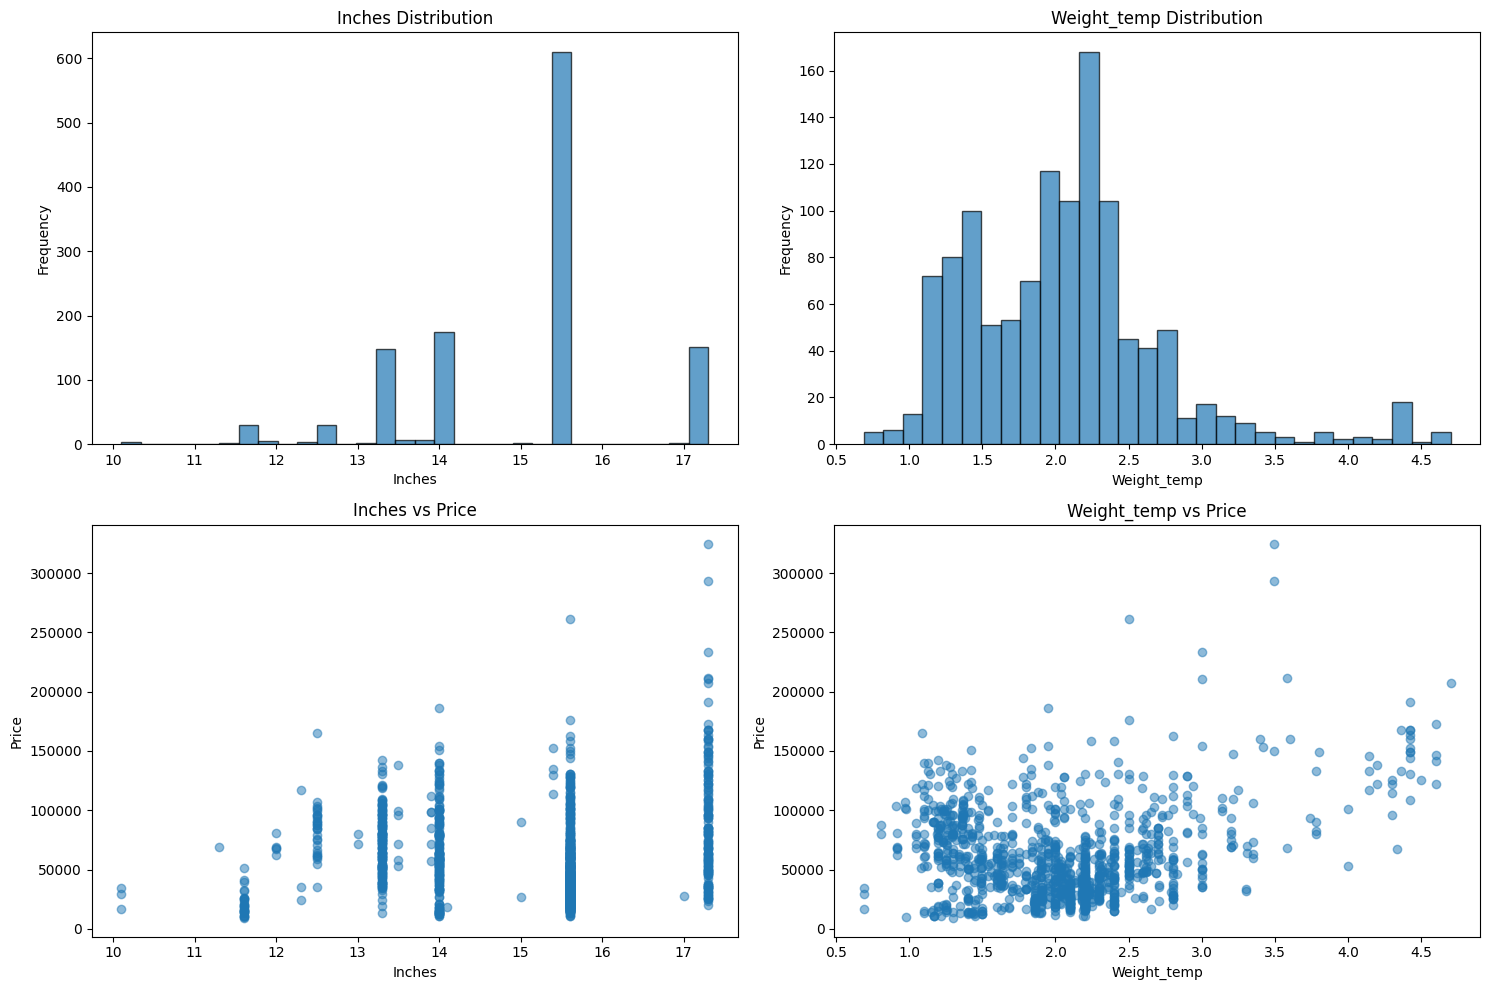

In [55]:
# 6. NUMERICAL FEATURES ANALYSIS
print("NUMERICAL FEATURES ANALYSIS")

# Identify numerical columns (excluding Price as it's our target)
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'Price' in numerical_cols:
    numerical_cols.remove('Price')

print(f"Numerical columns: {numerical_cols}")

# If we have Inches and Weight as strings with units, let's extract numerical values
# Check if Inches column exists and contains string values
if 'Inches' in data.columns and data['Inches'].dtype == 'object':
    print("Inches column contains string values - would need conversion in preprocessing")
    # For analysis purposes, create temporary numerical version
    inches_temp = pd.to_numeric(data['Inches'], errors='coerce')
    if 'Inches_temp' not in numerical_cols:
        numerical_cols.append('Inches_temp')
    data_temp = data.copy()
    data_temp['Inches_temp'] = inches_temp
else:
    data_temp = data.copy()

# Check if Weight column exists and contains string values with 'kg'
if 'Weight' in data.columns and data['Weight'].dtype == 'object':
    print("Weight column contains string values - would need conversion in preprocessing")
    # For analysis purposes, create temporary numerical version
    weight_temp = data['Weight'].str.extract('(\d+\.?\d*)').astype(float)
    if 'Weight_temp' not in numerical_cols:
        numerical_cols.append('Weight_temp')
    if 'data_temp' not in locals():
        data_temp = data.copy()
    data_temp['Weight_temp'] = weight_temp
else:
    if 'data_temp' not in locals():
        data_temp = data.copy()

print(f"Updated numerical columns: {numerical_cols}")

# Analyze numerical features
if len(numerical_cols) > 0:
    print("\nNumerical Features Statistics:")
    print(data_temp[numerical_cols].describe())
    
    # Correlation with Price
    print("\nCorrelation with Price:")
    correlations = data_temp[numerical_cols + ['Price']].corr()['Price'].sort_values(ascending=False)
    print(correlations[:-1])  # Exclude Price correlation with itself
    
    # Visualizations for numerical features
    n_cols = len(numerical_cols)
    if n_cols > 0:
        fig, axes = plt.subplots(2, max(2, (n_cols + 1) // 2), figsize=(15, 10))
        if n_cols == 1:
            axes = [axes]
        else:
            axes = axes.ravel()
        
        for i, col in enumerate(numerical_cols):
            if i < len(axes):
                # Distribution plot
                axes[i].hist(data_temp[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
                axes[i].set_title(f'{col} Distribution')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
        
        # Scatter plots against Price
        start_idx = len(numerical_cols)
        for i, col in enumerate(numerical_cols):
            if start_idx + i < len(axes):
                axes[start_idx + i].scatter(data_temp[col], data_temp['Price'], alpha=0.5)
                axes[start_idx + i].set_title(f'{col} vs Price')
                axes[start_idx + i].set_xlabel(col)
                axes[start_idx + i].set_ylabel('Price')
        
        # Remove empty subplots
        for j in range(len(numerical_cols) * 2, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()
else:
    print("No numerical columns found (other than Price)")


COMPREHENSIVE OUTLIER DETECTION
OUTLIER ANALYSIS FOR PRICE:
IQR Method: 28 outliers (2.39%)
Z-Score Method (|z| > 3): 11 outliers (0.94%)
Modified Z-Score Method: 14 outliers (1.19%)

Top 10 most expensive laptops (potential outliers):
    Company     TypeName                            Cpu   Ram       Price
79    Razer       Gaming    Intel Core i7 7820HK 2.9GHz  32GB  324954.720
187   Razer       Gaming    Intel Core i7 7820HK 2.9GHz  32GB  292986.720
391  Lenovo     Notebook  Intel Xeon E3-1535M v6 3.1GHz  32GB  261018.720
855      HP  Workstation  Intel Xeon E3-1535M v5 2.9GHz  16GB  233845.920
21     Asus       Gaming    Intel Core i7 6820HK 2.7GHz  64GB  211788.000
422      HP  Workstation    Intel Core i7 6700HQ 2.6GHz   8GB  210424.032
890    Asus       Gaming    Intel Core i7 7820HK 2.9GHz  32GB  207259.200
388    Dell       Gaming    Intel Core i7 7700HQ 2.8GHz  32GB  191211.264
836   Razer       Gaming    Intel Core i7 7700HQ 2.8GHz  16GB  186426.720
172  Lenovo  Workstation

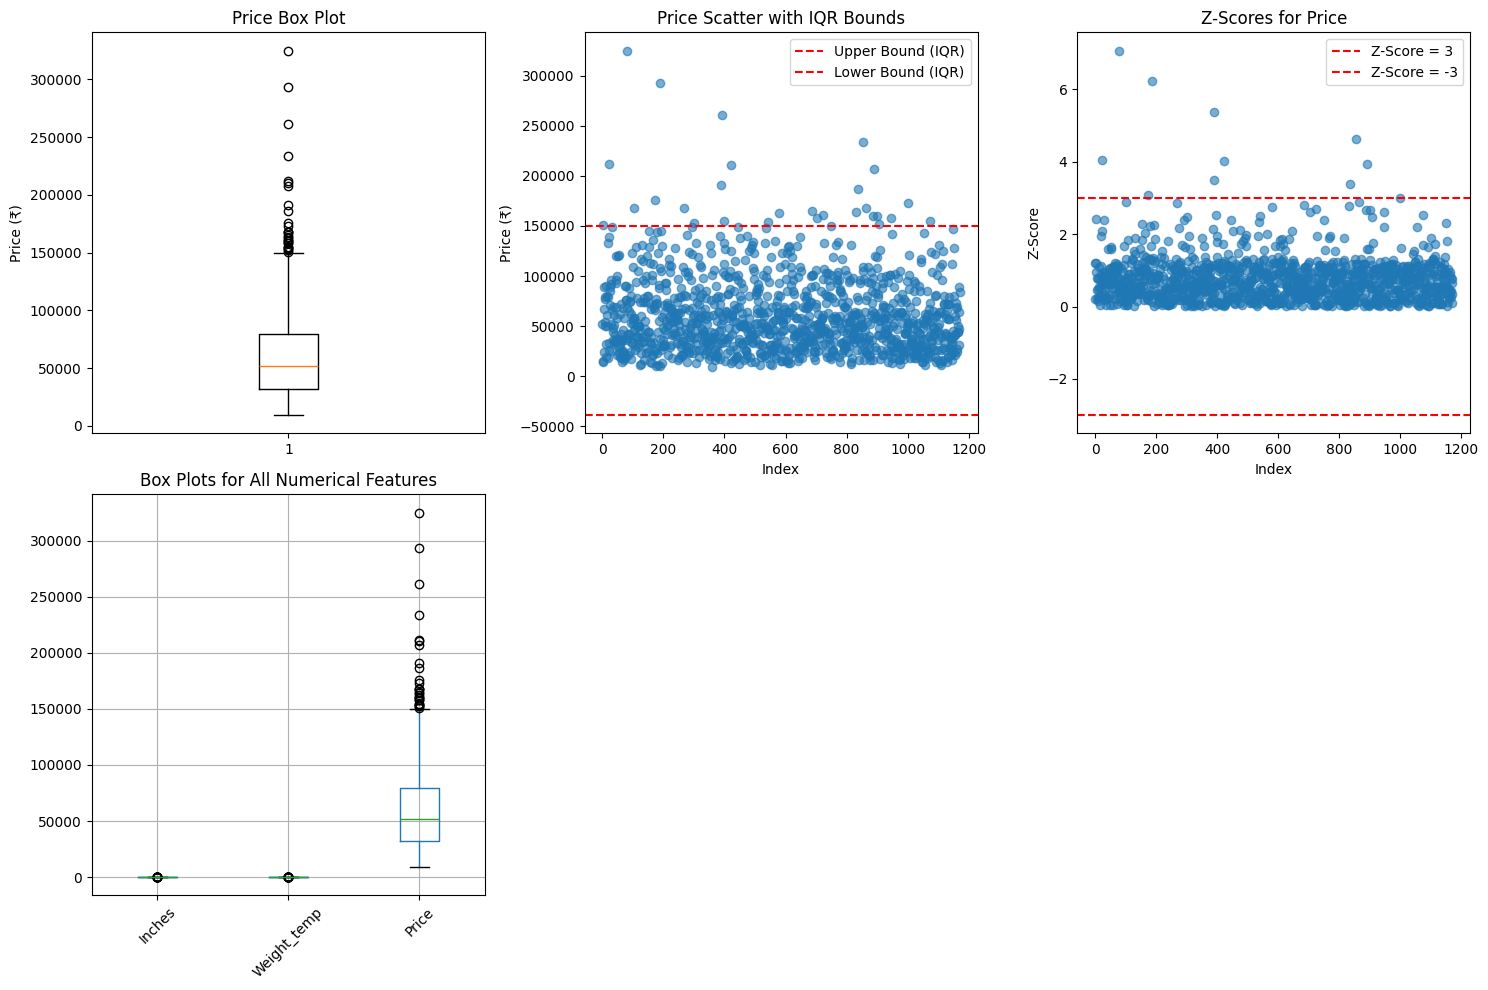

In [56]:
# 7. COMPREHENSIVE OUTLIER DETECTION
print("COMPREHENSIVE OUTLIER DETECTION")

# For Price (target variable)
print("OUTLIER ANALYSIS FOR PRICE:")

# Method 1: IQR Method
Q1_price = data['Price'].quantile(0.25)
Q3_price = data['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

outliers_iqr_price = data[(data['Price'] < lower_bound_price) | (data['Price'] > upper_bound_price)]
print(f"IQR Method: {len(outliers_iqr_price)} outliers ({len(outliers_iqr_price)/len(data)*100:.2f}%)")

# Method 2: Z-Score Method (|z| > 3)
from scipy import stats
z_scores_price = np.abs(stats.zscore(data['Price']))
outliers_zscore_price = data[z_scores_price > 3]
print(f"Z-Score Method (|z| > 3): {len(outliers_zscore_price)} outliers ({len(outliers_zscore_price)/len(data)*100:.2f}%)")

# Method 3: Modified Z-Score Method (using median)
median_price = data['Price'].median()
mad_price = np.median(np.abs(data['Price'] - median_price))
modified_z_scores = 0.6745 * (data['Price'] - median_price) / mad_price
outliers_modified_z = data[np.abs(modified_z_scores) > 3.5]
print(f"Modified Z-Score Method: {len(outliers_modified_z)} outliers ({len(outliers_modified_z)/len(data)*100:.2f}%)")

# Show some outlier examples
print(f"\nTop 10 most expensive laptops (potential outliers):")
expensive_outliers = data.nlargest(10, 'Price')[['Company', 'TypeName', 'Cpu', 'Ram', 'Price']]
print(expensive_outliers)

print(f"\nTop 10 cheapest laptops (potential outliers):")
cheap_outliers = data.nsmallest(10, 'Price')[['Company', 'TypeName', 'Cpu', 'Ram', 'Price']]
print(cheap_outliers)

# Visualizations for outliers
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.boxplot(data['Price'])
plt.title('Price Box Plot')
plt.ylabel('Price (₹)')

plt.subplot(2, 3, 2)
plt.scatter(range(len(data)), data['Price'], alpha=0.6)
plt.axhline(y=upper_bound_price, color='r', linestyle='--', label='Upper Bound (IQR)')
plt.axhline(y=lower_bound_price, color='r', linestyle='--', label='Lower Bound (IQR)')
plt.title('Price Scatter with IQR Bounds')
plt.xlabel('Index')
plt.ylabel('Price (₹)')
plt.legend()

plt.subplot(2, 3, 3)
plt.scatter(range(len(data)), z_scores_price, alpha=0.6)
plt.axhline(y=3, color='r', linestyle='--', label='Z-Score = 3')
plt.axhline(y=-3, color='r', linestyle='--', label='Z-Score = -3')
plt.title('Z-Scores for Price')
plt.xlabel('Index')
plt.ylabel('Z-Score')
plt.legend()

# For numerical features (if any)
if len(numerical_cols) > 0:
    plt.subplot(2, 3, 4)
    # Use data_temp which contains the temporary numerical columns
    if 'data_temp' in locals():
        data_temp[numerical_cols + ['Price']].boxplot(ax=plt.gca())
    else:
        data[numerical_cols + ['Price']].boxplot(ax=plt.gca())
    plt.title('Box Plots for All Numerical Features')
    plt.xticks(rotation=45)
    
    # Outlier detection for other numerical features
    print(f"\nOUTLIER ANALYSIS FOR OTHER NUMERICAL FEATURES:")
    # Use data_temp if it exists, otherwise use data
    analysis_data = data_temp if 'data_temp' in locals() else data
    for col in numerical_cols:
        if col in analysis_data.columns:
            Q1 = analysis_data[col].quantile(0.25)
            Q3 = analysis_data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = analysis_data[(analysis_data[col] < lower_bound) | (analysis_data[col] > upper_bound)]
            print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(analysis_data)*100:.2f}%)")

plt.tight_layout()
plt.show()


CORRELATION ANALYSIS
Correlation Matrix:
              Inches  Weight_temp     Price
Inches       1.00000     0.824160  0.072210
Weight_temp  0.82416     1.000000  0.216858
Price        0.07221     0.216858  1.000000

Features correlation with Price (sorted):
Price          1.000000
Weight_temp    0.216858
Name: Price, dtype: float64


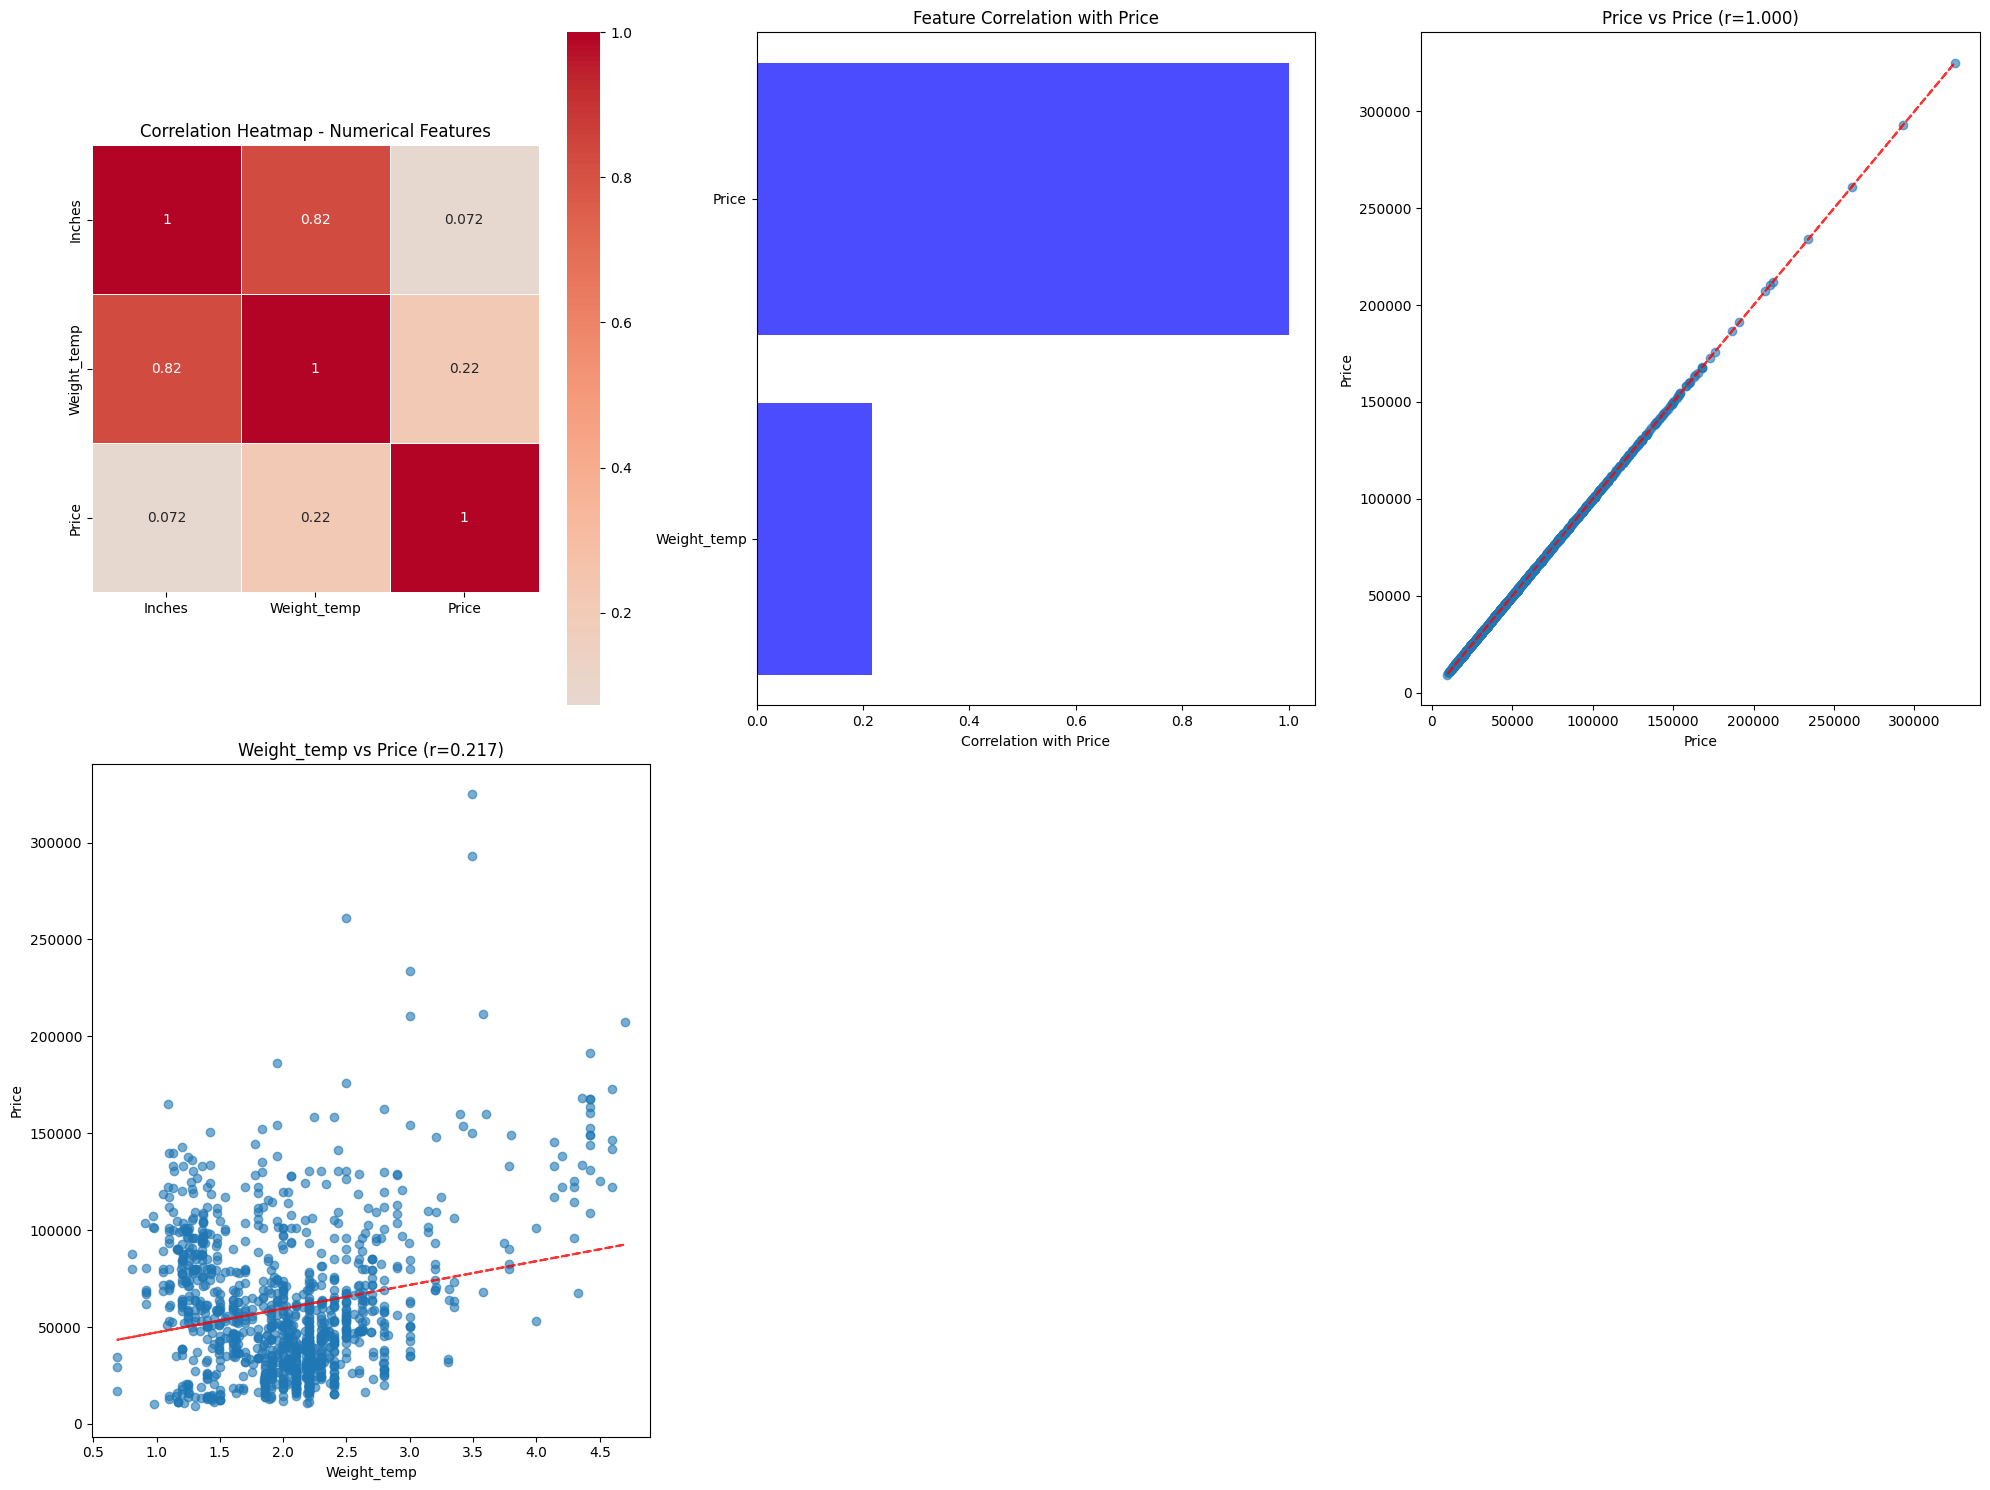


CATEGORICAL FEATURES ANALYSIS WITH PRICE:


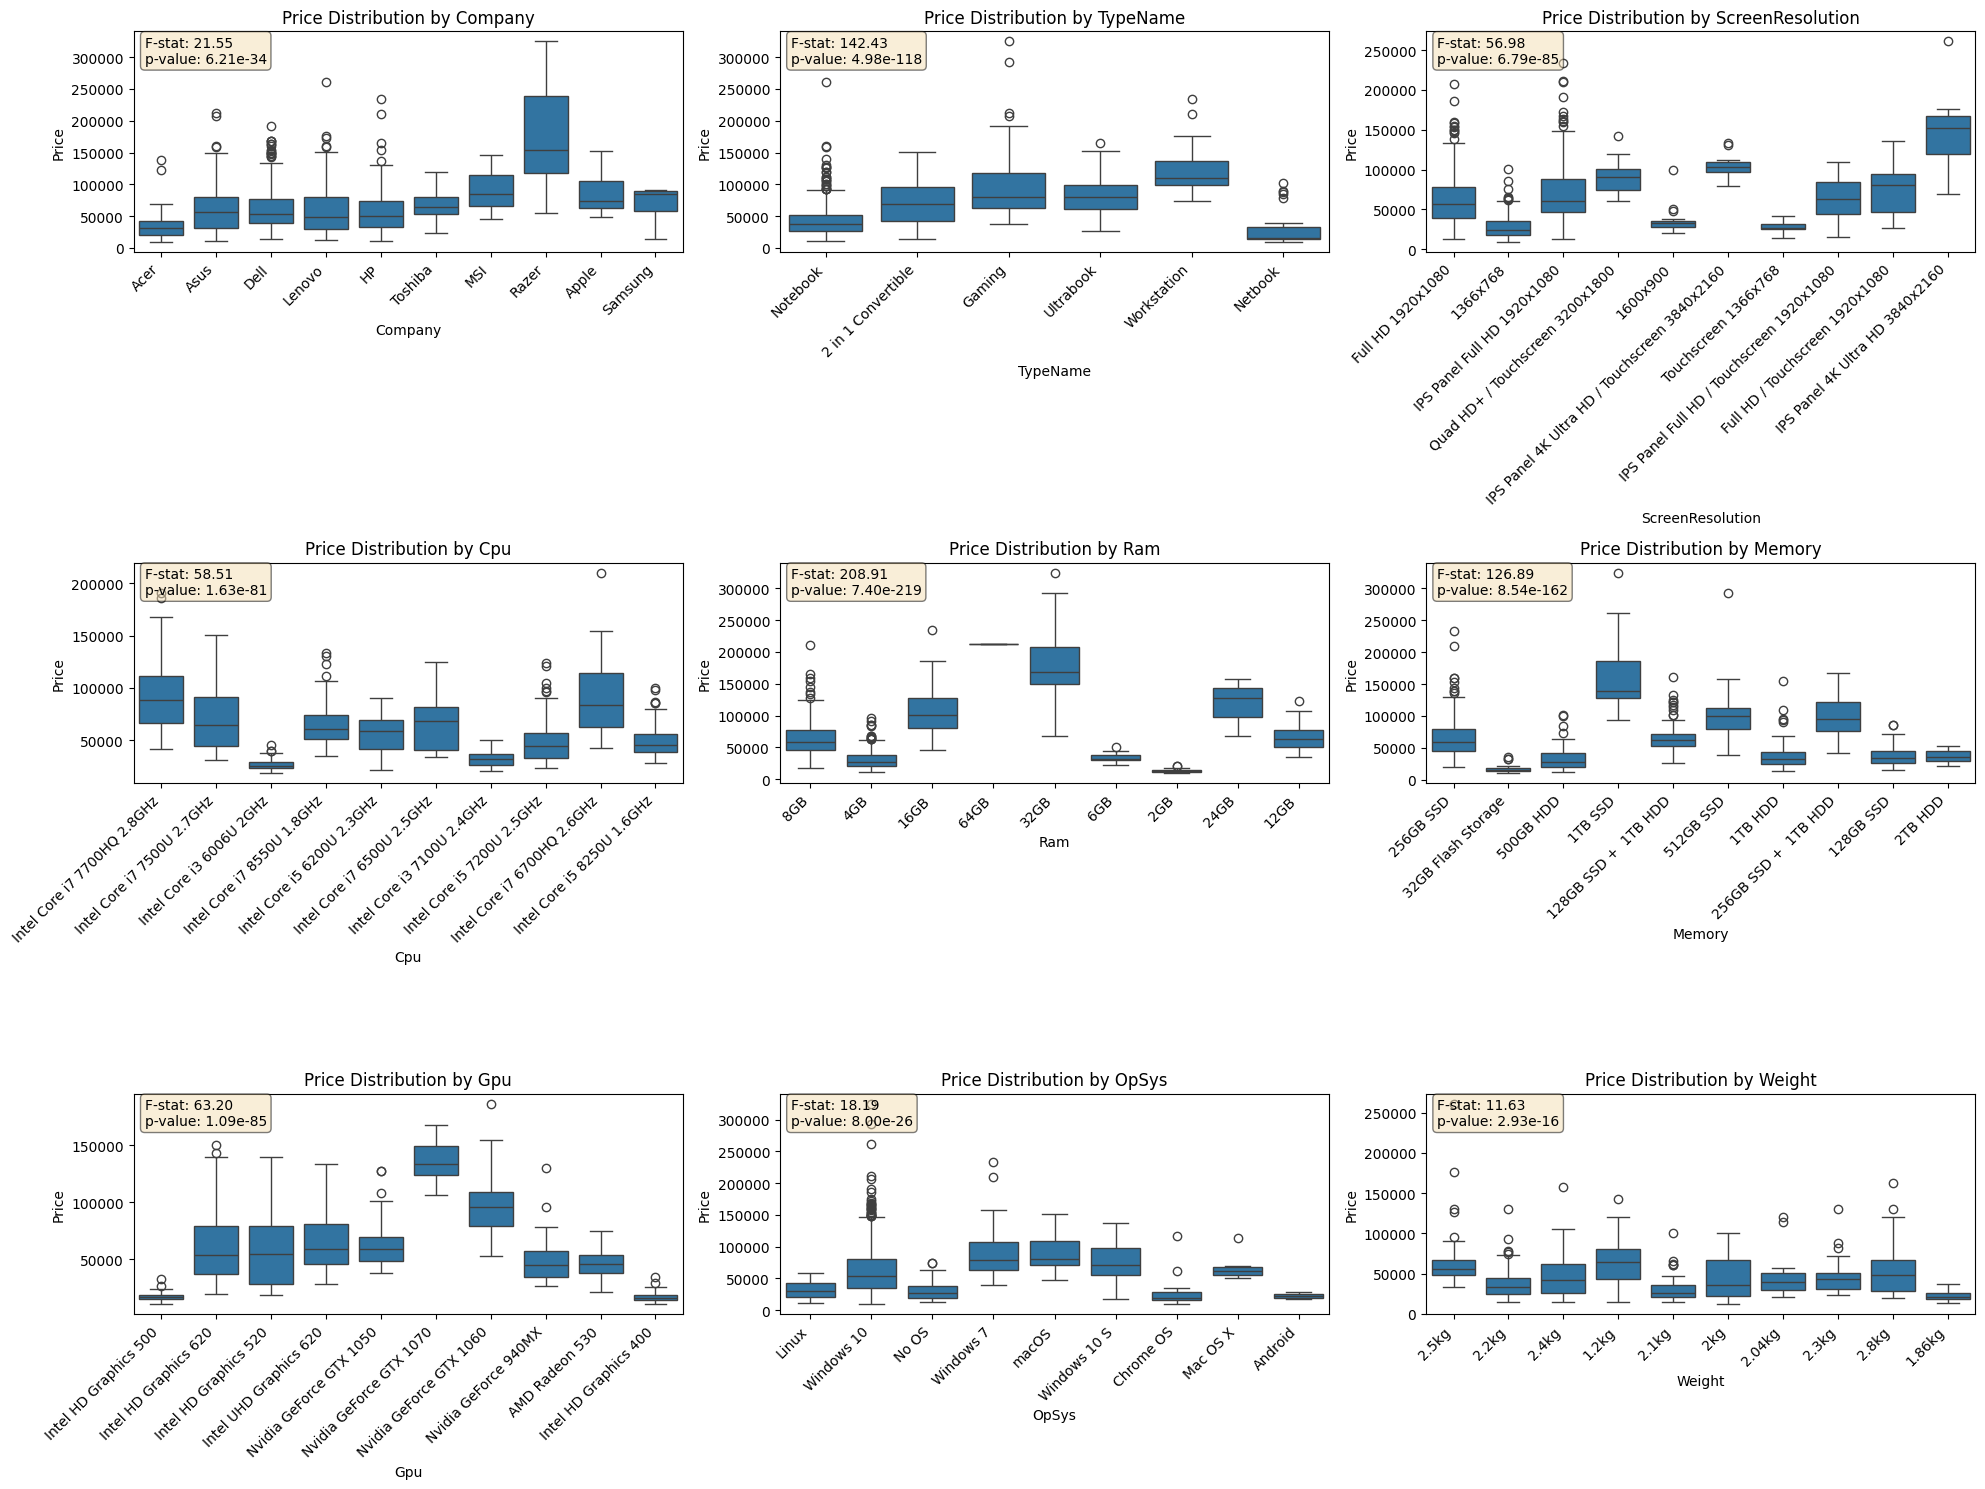

In [57]:
# 8. CORRELATION ANALYSIS AND HEATMAPS
print("CORRELATION ANALYSIS")

# For numerical features correlation
if len(numerical_cols) > 0:
    # Create correlation matrix
    corr_cols = numerical_cols + ['Price']
    correlation_matrix = data_temp[corr_cols].corr()
    
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    # Correlation with target variable (Price)
    price_correlations = correlation_matrix['Price'].sort_values(ascending=False)
    print(f"\nFeatures correlation with Price (sorted):")
    print(price_correlations[:-1])  # Exclude Price correlation with itself
    
    # Visualizations
    plt.figure(figsize=(20, 15))
    
    # Correlation heatmap
    plt.subplot(2, 3, 1)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('Correlation Heatmap - Numerical Features')
    
    # Price correlation bar plot
    plt.subplot(2, 3, 2)
    price_corr_plot = price_correlations[:-1].sort_values()
    colors = ['red' if x < 0 else 'blue' for x in price_corr_plot.values]
    plt.barh(range(len(price_corr_plot)), price_corr_plot.values, color=colors, alpha=0.7)
    plt.yticks(range(len(price_corr_plot)), price_corr_plot.index)
    plt.xlabel('Correlation with Price')
    plt.title('Feature Correlation with Price')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Scatter plots for top correlated features
    top_correlated = price_correlations[:-1].abs().nlargest(3).index.tolist()
    
    for i, feature in enumerate(top_correlated):
        if i < 3:
            plt.subplot(2, 3, 3 + i)
            plt.scatter(data_temp[feature], data_temp['Price'], alpha=0.6)
            plt.xlabel(feature)
            plt.ylabel('Price')
            plt.title(f'{feature} vs Price (r={price_correlations[feature]:.3f})')
            
            # Add trend line
            z = np.polyfit(data_temp[feature].dropna(), data_temp[data_temp[feature].notna()]['Price'], 1)
            p = np.poly1d(z)
            plt.plot(data_temp[feature].dropna(), p(data_temp[feature].dropna()), "r--", alpha=0.8)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No numerical features available for correlation analysis")

# Analyze categorical features relationship with Price
print(f"\nCATEGORICAL FEATURES ANALYSIS WITH PRICE:")

plt.figure(figsize=(20, 15))

# Create subplot for each categorical feature
n_cat_cols = len(categorical_cols)
n_rows = (n_cat_cols + 2) // 3
n_cols = min(3, n_cat_cols)

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Box plot for categorical vs Price
    top_categories = data[col].value_counts().head(10).index
    filtered_data = data[data[col].isin(top_categories)]
    
    sns.boxplot(data=filtered_data, x=col, y='Price')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Price Distribution by {col}')
    
    # Calculate and display ANOVA F-statistic
    groups = [filtered_data[filtered_data[col] == cat]['Price'].values for cat in top_categories]
    groups = [group for group in groups if len(group) > 0]  # Remove empty groups
    
    if len(groups) > 1:
        f_stat, p_value = stats.f_oneway(*groups)
        plt.text(0.02, 0.98, f'F-stat: {f_stat:.2f}\np-value: {p_value:.2e}', 
                transform=plt.gca().transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


ADVANCED FEATURE ANALYSIS
DETAILED FEATURE ANALYSIS (for preprocessing insights):

--- RAM ANALYSIS ---
RAM Distribution (would be extracted in preprocessing):
0   
2.0      19
4.0     338
6.0      35
8.0     556
12.0     20
16.0    187
24.0      3
32.0     13
64.0      1
Name: count, dtype: int64

RAM vs Price Statistics:
                      mean     median  count
Ram_GB_temp                                 
2.0           13218.207158   12201.12     19
4.0           30614.539825   26586.72    338
6.0           32850.088457   30849.12     35
8.0           62862.608279   58554.72    556
12.0          66301.525440   62550.72     20
16.0         103567.553018  101178.72    187
24.0         117553.440000  126912.96      3
32.0         189045.882831  167778.72     13
64.0         211788.000000  211788.00      1

--- CPU ANALYSIS ---
CPU Brand Distribution (would be extracted in preprocessing):
0    
Intel    1115
AMD        56
Other       1
Name: count, dtype: int64

CPU Series Distributi

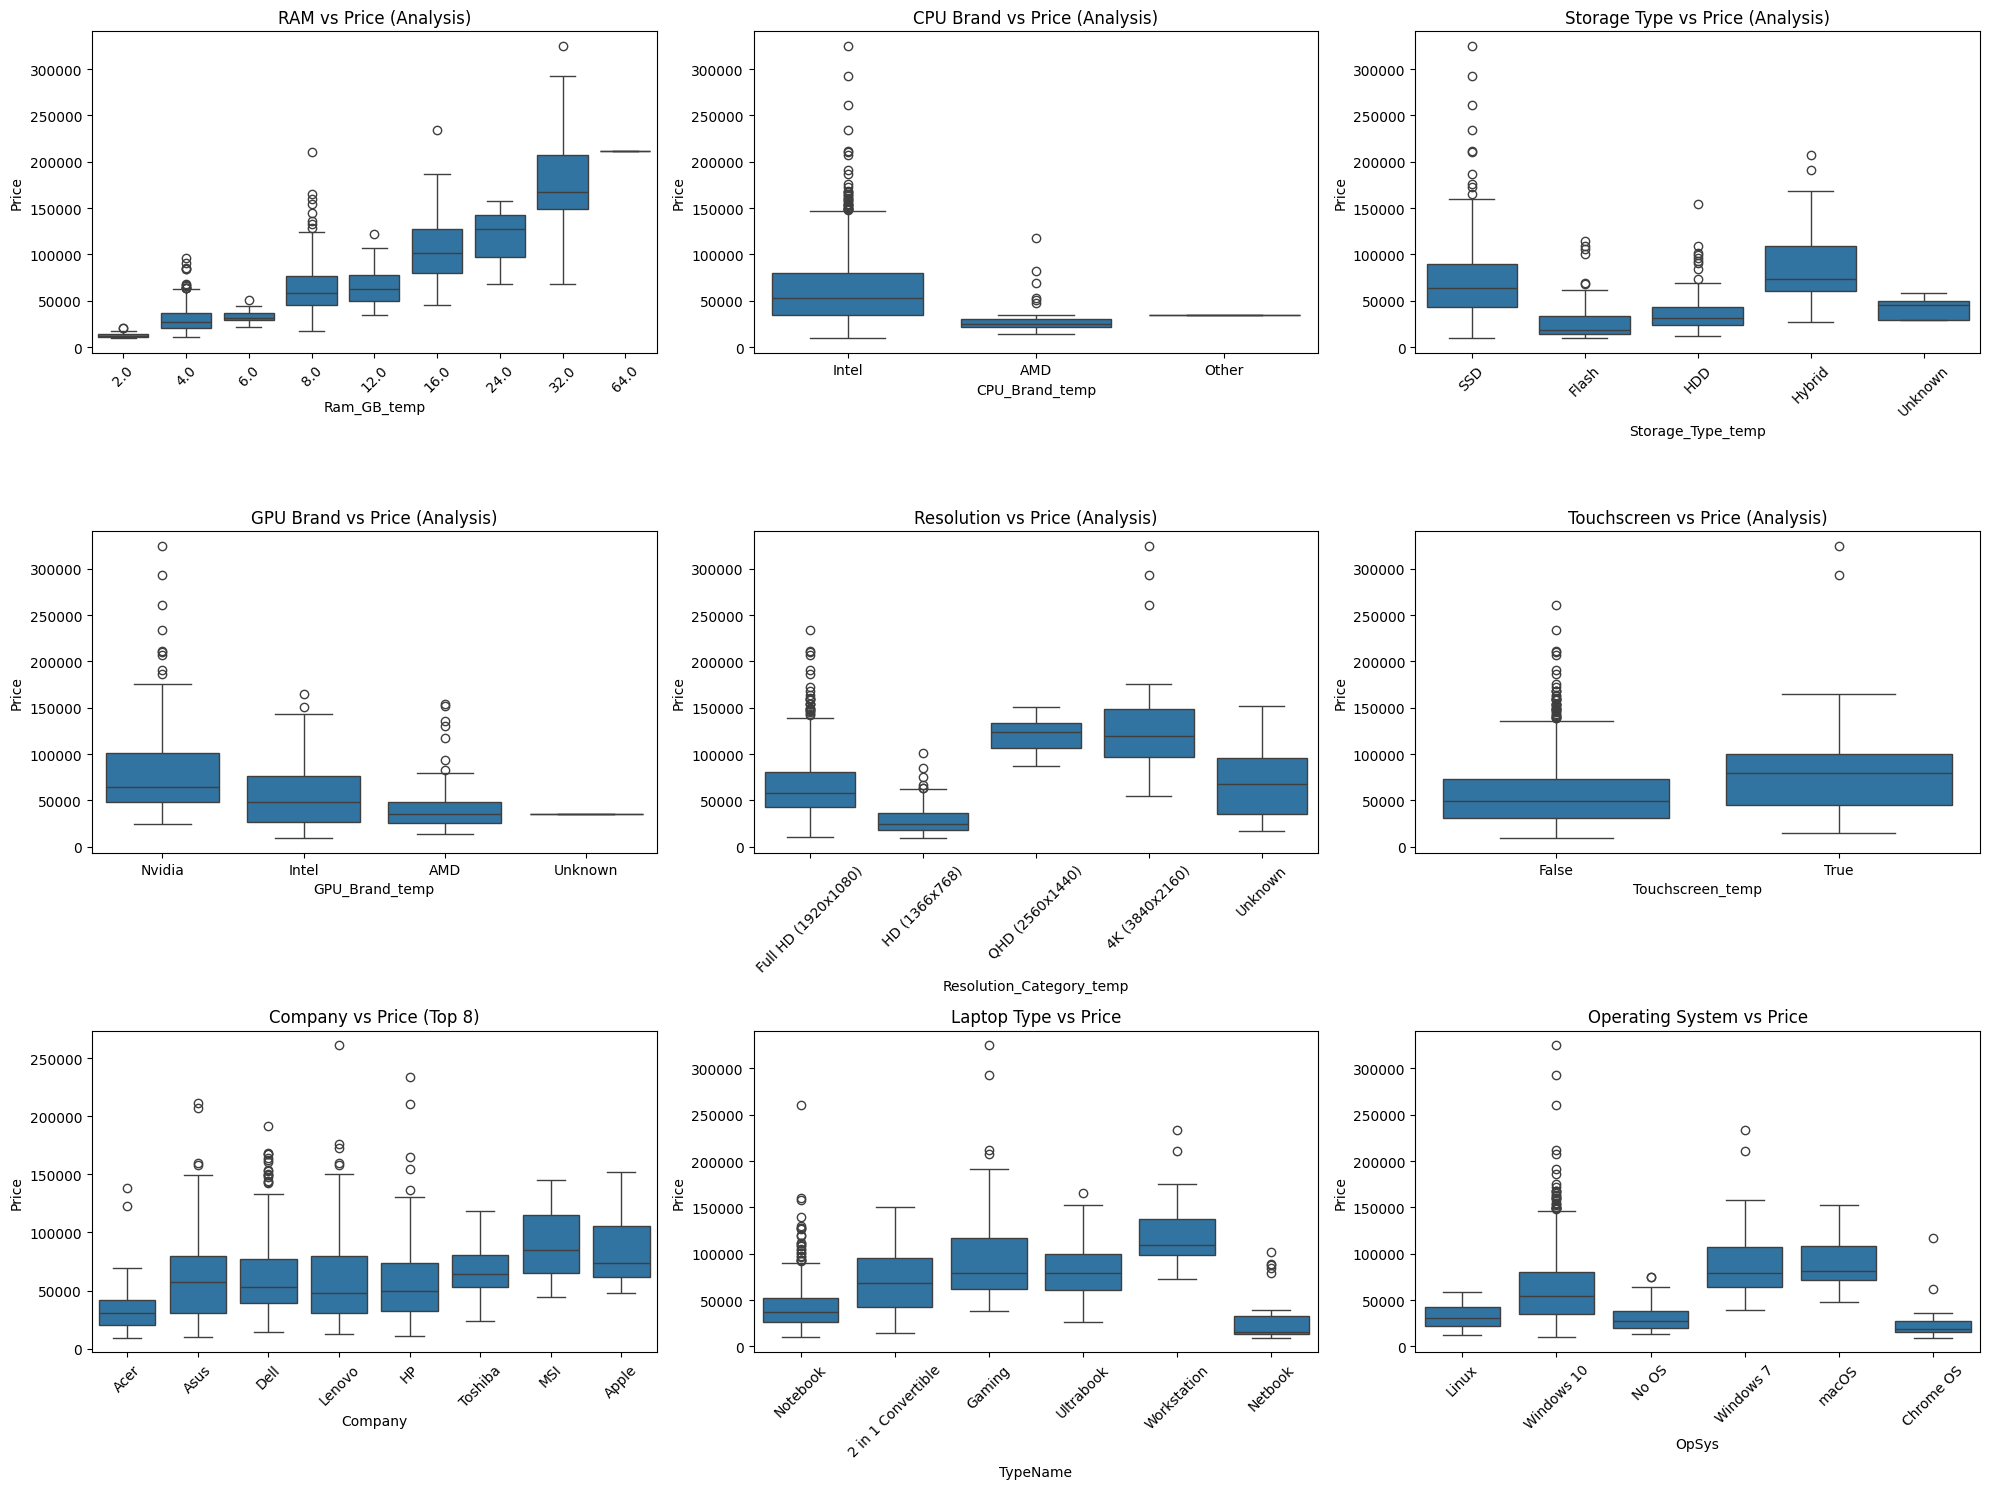

In [58]:
# 9. ADVANCED FEATURE ANALYSIS
print("ADVANCED FEATURE ANALYSIS")

# Analyze complex features for insights (without modifying original data)
print("DETAILED FEATURE ANALYSIS (for preprocessing insights):")

# RAM Analysis - Analyze patterns without modifying data
if 'Ram' in data.columns:
    print("\n--- RAM ANALYSIS ---")
    # Create temporary analysis without modifying original data
    ram_temp = data['Ram'].str.extract('(\d+)').astype(float)
    print("RAM Distribution (would be extracted in preprocessing):")
    print(ram_temp.value_counts().sort_index())
    
    # RAM vs Price analysis using temporary data
    data_ram_temp = data.copy()
    data_ram_temp['Ram_GB_temp'] = ram_temp
    ram_price_stats = data_ram_temp.groupby('Ram_GB_temp')['Price'].agg(['mean', 'median', 'count']).sort_values('mean')
    print("\nRAM vs Price Statistics:")
    print(ram_price_stats)

# CPU Analysis - Analyze patterns without modifying data
if 'Cpu' in data.columns:
    print("\n--- CPU ANALYSIS ---")
    # Analyze CPU brand patterns without modifying original data
    cpu_brand_temp = data['Cpu'].str.extract('(Intel|AMD)', flags=re.IGNORECASE)
    cpu_brand_temp = cpu_brand_temp.fillna('Other')
    
    # Analyze CPU series patterns
    cpu_series_temp = data['Cpu'].str.extract('(i[3579]|Ryzen [3579]|Core [mi][3579]|Celeron|Pentium|Atom)', flags=re.IGNORECASE)
    
    print("CPU Brand Distribution (would be extracted in preprocessing):")
    print(cpu_brand_temp.value_counts())
    
    print("\nCPU Series Distribution (would be extracted in preprocessing):")
    print(cpu_series_temp.value_counts())
    
    # CPU vs Price analysis using temporary data
    data_cpu_temp = data.copy()
    data_cpu_temp['CPU_Brand_temp'] = cpu_brand_temp
    cpu_brand_price = data_cpu_temp.groupby('CPU_Brand_temp')['Price'].agg(['mean', 'median', 'count'])
    print("\nCPU Brand vs Price:")
    print(cpu_brand_price)

# Memory/Storage Analysis - Analyze patterns without modifying data
if 'Memory' in data.columns:
    print("\n--- MEMORY/STORAGE ANALYSIS ---")
    # Analyze storage type patterns without modifying original data
    storage_type_temp = pd.Series('Unknown', index=data.index)
    storage_type_temp.loc[data['Memory'].str.contains('SSD', case=False, na=False)] = 'SSD'
    storage_type_temp.loc[data['Memory'].str.contains('HDD', case=False, na=False)] = 'HDD'
    storage_type_temp.loc[data['Memory'].str.contains('Flash', case=False, na=False)] = 'Flash'
    storage_type_temp.loc[data['Memory'].str.contains('SSD.*HDD|HDD.*SSD', case=False, na=False)] = 'Hybrid'
    
    print("Storage Type Distribution (would be extracted in preprocessing):")
    print(storage_type_temp.value_counts())
    
    # Storage vs Price analysis using temporary data
    data_storage_temp = data.copy()
    data_storage_temp['Storage_Type_temp'] = storage_type_temp
    storage_price = data_storage_temp.groupby('Storage_Type_temp')['Price'].agg(['mean', 'median', 'count'])
    print("\nStorage Type vs Price:")
    print(storage_price)
    
    # Analyze storage capacity patterns
    storage_numbers = data['Memory'].str.findall(r'(\d+(?:\.\d+)?)\s*(?:GB|TB)', flags=re.IGNORECASE)
    storage_capacity_temp = storage_numbers.apply(lambda x: sum([float(num) * (1000 if 'TB' in str(x).upper() else 1) for num in x]) if x else 0)
    print(f"\nStorage Capacity Analysis (would be extracted in preprocessing):")
    print(f"Range: {storage_capacity_temp.min():.0f}GB - {storage_capacity_temp.max():.0f}GB")
    print(f"Mean: {storage_capacity_temp.mean():.0f}GB")

# GPU Analysis - Analyze patterns without modifying data
if 'Gpu' in data.columns:
    print("\n--- GPU ANALYSIS ---")
    # Analyze GPU brand patterns without modifying original data
    gpu_brand_temp = pd.Series('Unknown', index=data.index)
    gpu_brand_temp.loc[data['Gpu'].str.contains('Intel', case=False, na=False)] = 'Intel'
    gpu_brand_temp.loc[data['Gpu'].str.contains('Nvidia|GeForce|GTX|RTX', case=False, na=False)] = 'Nvidia'
    gpu_brand_temp.loc[data['Gpu'].str.contains('AMD|Radeon', case=False, na=False)] = 'AMD'
    
    print("GPU Brand Distribution (would be extracted in preprocessing):")
    print(gpu_brand_temp.value_counts())
    
    # GPU vs Price analysis using temporary data
    data_gpu_temp = data.copy()
    data_gpu_temp['GPU_Brand_temp'] = gpu_brand_temp
    gpu_price = data_gpu_temp.groupby('GPU_Brand_temp')['Price'].agg(['mean', 'median', 'count'])
    print("\nGPU Brand vs Price:")
    print(gpu_price)

# Screen Resolution Analysis - Analyze patterns without modifying data
if 'ScreenResolution' in data.columns:
    print("\n--- SCREEN RESOLUTION ANALYSIS ---")
    # Analyze resolution categories without modifying original data
    resolution_category_temp = pd.Series('Unknown', index=data.index)
    resolution_category_temp.loc[data['ScreenResolution'].str.contains('1366x768', case=False, na=False)] = 'HD (1366x768)'
    resolution_category_temp.loc[data['ScreenResolution'].str.contains('1920x1080|Full HD', case=False, na=False)] = 'Full HD (1920x1080)'
    resolution_category_temp.loc[data['ScreenResolution'].str.contains('2560x1440', case=False, na=False)] = 'QHD (2560x1440)'
    resolution_category_temp.loc[data['ScreenResolution'].str.contains('3840x2160|4K', case=False, na=False)] = '4K (3840x2160)'
    
    # Analyze touchscreen patterns
    touchscreen_temp = data['ScreenResolution'].str.contains('Touchscreen', case=False, na=False)
    
    print("Resolution Category Distribution (would be extracted in preprocessing):")
    print(resolution_category_temp.value_counts())
    
    print("\nTouchscreen Distribution (would be extracted in preprocessing):")
    print(touchscreen_temp.value_counts())
    
    # Resolution vs Price analysis using temporary data
    data_res_temp = data.copy()
    data_res_temp['Resolution_Category_temp'] = resolution_category_temp
    resolution_price = data_res_temp.groupby('Resolution_Category_temp')['Price'].agg(['mean', 'median', 'count'])
    print("\nResolution Category vs Price:")
    print(resolution_price)

# Create visualizations for analysis (using temporary extracted features)
plt.figure(figsize=(20, 15))

# RAM vs Price
plt.subplot(3, 3, 1)
if 'ram_temp' in locals():
    data_ram_viz = data.copy()
    data_ram_viz['Ram_GB_temp'] = ram_temp
    sns.boxplot(data=data_ram_viz, x='Ram_GB_temp', y='Price')
    plt.title('RAM vs Price (Analysis)')
    plt.xticks(rotation=45)

# CPU Brand vs Price
plt.subplot(3, 3, 2)
if 'cpu_brand_temp' in locals():
    data_cpu_viz = data.copy()
    data_cpu_viz['CPU_Brand_temp'] = cpu_brand_temp
    sns.boxplot(data=data_cpu_viz, x='CPU_Brand_temp', y='Price')
    plt.title('CPU Brand vs Price (Analysis)')

# Storage Type vs Price
plt.subplot(3, 3, 3)
if 'storage_type_temp' in locals():
    data_storage_viz = data.copy()
    data_storage_viz['Storage_Type_temp'] = storage_type_temp
    sns.boxplot(data=data_storage_viz, x='Storage_Type_temp', y='Price')
    plt.title('Storage Type vs Price (Analysis)')
    plt.xticks(rotation=45)

# GPU Brand vs Price
plt.subplot(3, 3, 4)
if 'gpu_brand_temp' in locals():
    data_gpu_viz = data.copy()
    data_gpu_viz['GPU_Brand_temp'] = gpu_brand_temp
    sns.boxplot(data=data_gpu_viz, x='GPU_Brand_temp', y='Price')
    plt.title('GPU Brand vs Price (Analysis)')

# Resolution vs Price
plt.subplot(3, 3, 5)
if 'resolution_category_temp' in locals():
    data_res_viz = data.copy()
    data_res_viz['Resolution_Category_temp'] = resolution_category_temp
    sns.boxplot(data=data_res_viz, x='Resolution_Category_temp', y='Price')
    plt.title('Resolution vs Price (Analysis)')
    plt.xticks(rotation=45)

# Touchscreen vs Price
plt.subplot(3, 3, 6)
if 'touchscreen_temp' in locals():
    data_touch_viz = data.copy()
    data_touch_viz['Touchscreen_temp'] = touchscreen_temp
    sns.boxplot(data=data_touch_viz, x='Touchscreen_temp', y='Price')
    plt.title('Touchscreen vs Price (Analysis)')

# Company vs Price (top companies)
plt.subplot(3, 3, 7)
top_companies = data['Company'].value_counts().head(8).index
company_data = data[data['Company'].isin(top_companies)]
sns.boxplot(data=company_data, x='Company', y='Price')
plt.title('Company vs Price (Top 8)')
plt.xticks(rotation=45)

# TypeName vs Price
plt.subplot(3, 3, 8)
sns.boxplot(data=data, x='TypeName', y='Price')
plt.title('Laptop Type vs Price')
plt.xticks(rotation=45)

# Operating System vs Price
plt.subplot(3, 3, 9)
if 'OpSys' in data.columns:
    top_os = data['OpSys'].value_counts().head(6).index
    os_data = data[data['OpSys'].isin(top_os)]
    sns.boxplot(data=os_data, x='OpSys', y='Price')
    plt.title('Operating System vs Price')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [59]:
# 10. KEY INSIGHTS AND RECOMMENDATIONS
print("KEY INSIGHTS AND RECOMMENDATIONS FOR PREPROCESSING")

# Summary of findings
print("COMPREHENSIVE DATA ANALYSIS SUMMARY:")

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total Records: {data.shape[0]:,}")
print(f"   • Total Features: {data.shape[1]} (original)")
print(f"   • Target Variable: Price (₹{data['Price'].min():.0f} - ₹{data['Price'].max():.0f})")
print(f"   • Note: Feature extraction analysis shows potential for 20+ features after preprocessing")

print(f"\n🔍 DATA QUALITY:")
missing_summary = data.isnull().sum().sum()
duplicate_summary = data.duplicated().sum()
print(f"   • Missing Values: {missing_summary} total")
print(f"   • Duplicate Records: {duplicate_summary}")
print(f"   • Data Quality: {'Good' if missing_summary == 0 and duplicate_summary == 0 else 'Needs Attention'}")

print(f"\n💰 TARGET VARIABLE (PRICE) INSIGHTS:")
print(f"   • Mean Price: ₹{data['Price'].mean():.0f}")
print(f"   • Median Price: ₹{data['Price'].median():.0f}")
print(f"   • Price Skewness: {data['Price'].skew():.2f} ({'Right-skewed' if data['Price'].skew() > 0 else 'Left-skewed'})")
print(f"   • Outliers (IQR method): {len(outliers_iqr_price)} ({len(outliers_iqr_price)/len(data)*100:.1f}%)")

print(f"\n🏷️ CATEGORICAL FEATURES:")
for col in categorical_cols:
    unique_count = data[col].nunique()
    most_common = data[col].mode()[0]
    print(f"   • {col}: {unique_count} unique values (Most common: {most_common})")

print(f"\n🔢 NUMERICAL FEATURES:")
if len(numerical_cols) > 0:
    for col in numerical_cols:
        if col in data.columns:
            print(f"   • {col}: Range [{data[col].min():.2f} - {data[col].max():.2f}]")
else:
    print("   • Most features are categorical and need preprocessing")

print(f"\n📈 KEY PRICE DRIVERS (Analysis Insights):")
# Analyze which features have the strongest relationship with price
insights = []

# Check RAM impact (from analysis)
if 'ram_temp' in locals():
    ram_corr = data_ram_temp[['Ram_GB_temp', 'Price']].corr().iloc[0,1]
    insights.append(f"RAM: Higher RAM correlates with price (r={ram_corr:.3f})")

# Check storage type impact (from analysis)
if 'storage_type_temp' in locals():
    storage_price_diff = data_storage_temp.groupby('Storage_Type_temp')['Price'].mean()
    if len(storage_price_diff) > 1:
        best_storage = storage_price_diff.idxmax()
        worst_storage = storage_price_diff.idxmin()
        insights.append(f"Storage: {best_storage} laptops cost ~₹{storage_price_diff[best_storage]-storage_price_diff[worst_storage]:.0f} more than {worst_storage}")

# Check GPU impact (from analysis)
if 'gpu_brand_temp' in locals():
    gpu_price_diff = data_gpu_temp.groupby('GPU_Brand_temp')['Price'].mean()
    if len(gpu_price_diff) > 1:
        best_gpu = gpu_price_diff.idxmax()
        worst_gpu = gpu_price_diff.idxmin()
        insights.append(f"GPU: {best_gpu} GPUs cost ~₹{gpu_price_diff[best_gpu]-gpu_price_diff[worst_gpu]:.0f} more than {worst_gpu}")

# Check resolution impact (from analysis)
if 'resolution_category_temp' in locals():
    res_price_diff = data_res_temp.groupby('Resolution_Category_temp')['Price'].mean()
    if len(res_price_diff) > 1:
        best_res = res_price_diff.idxmax()
        insights.append(f"Resolution: {best_res} significantly impacts pricing")

for i, insight in enumerate(insights, 1):
    print(f"   {i}. {insight}")

print(f"\n⚠️ PREPROCESSING RECOMMENDATIONS:")
print("   1. FEATURE ENGINEERING:")
print("      • Extract numerical values from Ram, Weight, Storage capacity")
print("      • Create categorical features for CPU brand, GPU brand, Storage type")
print("      • Parse screen resolution into width, height, and type")
print("      • Create binary features for touchscreen, gaming type, etc.")

print("\n   2. DATA CLEANING:")
if missing_summary > 0:
    print("      • Handle missing values (imputation or removal)")
if duplicate_summary > 0:
    print("      • Remove or handle duplicate records")
print("      • Standardize categorical values (case, spelling)")
print("      • Handle outliers (investigate extreme prices)")

print("\n   3. ENCODING:")
print("      • One-hot encode low-cardinality categorical features")
print("      • Label encode or target encode high-cardinality features")
print("      • Scale numerical features if using distance-based algorithms")

print("\n   4. TARGET VARIABLE:")
if data['Price'].skew() > 1:
    print("      • Consider log transformation for Price (highly skewed)")
else:
    print("      • Price distribution is acceptable for most algorithms")

print("\n   5. FEATURE SELECTION:")
print("      • Focus on features with strong price correlation")
print("      • Remove redundant features after encoding")
print("      • Consider dimensionality reduction for high-dimensional data")

print(f"\n✅ NEXT STEPS:")
print("   1. Use this analysis to guide data preprocessing")
print("   2. Implement feature engineering based on insights above")
print("   3. Create preprocessing pipeline")
print("   4. Split data into train/validation/test sets")
print("   5. Apply transformations and scaling")
print("   6. Proceed with model selection and training")

print("\nEDA COMPLETED - ANALYSIS ONLY, NO DATA MODIFICATIONS")


KEY INSIGHTS AND RECOMMENDATIONS FOR PREPROCESSING
COMPREHENSIVE DATA ANALYSIS SUMMARY:

📊 DATASET OVERVIEW:
   • Total Records: 1,172
   • Total Features: 11 (original)
   • Target Variable: Price (₹9271 - ₹324955)
   • Note: Feature extraction analysis shows potential for 20+ features after preprocessing

🔍 DATA QUALITY:
   • Missing Values: 0 total
   • Duplicate Records: 25
   • Data Quality: Needs Attention

💰 TARGET VARIABLE (PRICE) INSIGHTS:
   • Mean Price: ₹60081
   • Median Price: ₹52161
   • Price Skewness: 1.56 (Right-skewed)
   • Outliers (IQR method): 28 (2.4%)

🏷️ CATEGORICAL FEATURES:
   • Company: 19 unique values (Most common: Lenovo)
   • TypeName: 6 unique values (Most common: Notebook)
   • ScreenResolution: 39 unique values (Most common: Full HD 1920x1080)
   • Cpu: 111 unique values (Most common: Intel Core i5 7200U 2.5GHz)
   • Ram: 9 unique values (Most common: 8GB)
   • Memory: 38 unique values (Most common: 256GB SSD)
   • Gpu: 104 unique values (Most common: